<a href="https://colab.research.google.com/github/MohitPayasi/Play-Store-App-Reviews-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
path="https://drive.google.com/file/d/1zFwsjPz16QOGFAfufRp0caBP9gT_KqfL/view?usp=sharing"
path='https://drive.google.com/uc?id='+path.split("/")[-2]
play_store_data=pd.read_csv(path)
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Q1-find data information like shape ,columns and null values 

In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


find dataframe shape columns


In [ ]:
play_store_data.shape

(10841, 13)

In [ ]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

find null values from dataframe

In [ ]:
for i in play_store_data.columns :

  a=play_store_data[i].isnull().sum()
  print(i,"--",a)

App -- 0
Category -- 0
Rating -- 1474
Reviews -- 0
Size -- 0
Installs -- 0
Type -- 1
Price -- 0
Content Rating -- 1
Genres -- 0
Last Updated -- 0
Current Ver -- 8
Android Ver -- 3


Q2 find rating which are greater than 5 in play store data and drop those columns

In [ ]:
play_store_data[play_store_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
play_store_data.drop([10472],axis=0,inplace=True)

In [ ]:
play_store_data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
play_store_data['Rating'].mean(),play_store_data['Rating'].std(),play_store_data['Rating'].median()

(4.191757420456972, 0.5152188586177886, 4.3)

replace null values of rating columns by median of rating

In [ ]:
play_store_data['Rating'].fillna(play_store_data['Rating'].median(),inplace=True)

In [ ]:
for i in play_store_data.columns :
  a=play_store_data[i].isnull().sum()
  print(i,a)

App 0
Category 0
Rating 0
Reviews 0
Size 0
Installs 0
Type 1
Price 0
Content Rating 0
Genres 0
Last Updated 0
Current Ver 8
Android Ver 2


In [ ]:
play_store_data.dropna(axis=1)

for i in play_store_data.columns :
  a=play_store_data[i].isnull().sum()
  print(i,a)

App 0
Category 0
Rating 0
Reviews 0
Size 0
Installs 0
Type 1
Price 0
Content Rating 0
Genres 0
Last Updated 0
Current Ver 8
Android Ver 2


In [ ]:
play_store_data['Type'].fillna(play_store_data['Type'].mode()[0],inplace=True)# replace null values by mode 

In [ ]:
play_store_data.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)# drop not necessary columns for play store data


In [ ]:

play_store_data['Reviews']=play_store_data['Reviews'].astype(int)# convert data type into integer

# in size columns have some values likes as " varies with devices "  convert these values into null values than replace these values by mode 
play_store_data['Size']=play_store_data['Size'].replace('Varies with device',np.NaN) #

play_store_data['Size'].fillna(play_store_data['Size'].mode()[0],inplace=True)


In [ ]:
play_store_data['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839     11M
10840     19M
Name: Size, Length: 10840, dtype: object

In [ ]:
#in size columns have data in kilo bytes and mega bytes formats , the values of 1k is 1024 and 1M means 1024*1024  , we assume these values as 1000 and 10000000 respectively 
#so now we convert size columns data into numerical values
play_store_data['Size']=play_store_data['Size'].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


In [ ]:
#find how many times  installed and  what is price values price values

play_store_data[['Installs','Price']].value_counts()

Installs     Price 
1,000,000+   0         1555
10,000,000+  0         1249
100,000+     0         1079
10,000+      0          925
1,000+       0          758
                       ... 
1+           $1.99        1
0+           $1.49        1
100+         $1.26        1
             $14.00       1
0            0            1
Length: 261, dtype: int64

In [ ]:
# in installs and price  columns have not clean data , in these columns have  data 10000+ , $12.00  like this , so for removing these symbol create fucttion 

def clean_data(x):
  if  isinstance(x,str):
    return (x.replace('$','').replace(',','').replace('+',''))
  return (x)

In [ ]:
play_store_data['Installs']=play_store_data['Installs'].apply(clean_data)
play_store_data['Price']=play_store_data['Price'].apply(clean_data)

In [ ]:
  #convert  string type data into  numeric type

play_store_data['Price']=pd.to_numeric(play_store_data['Price'])
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

In [ ]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015"


In [ ]:
play_store_data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.987211e+07,1.546434e+07,1.027368
std,0.480342,2.927761e+06,2.109619e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.100000e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


for above table , we can observe that what is maximum , mininum , mean values and standrad deviation of numerical columns, 

Q3 find which app mostly installed category wise AND which type of apps are mostly installed

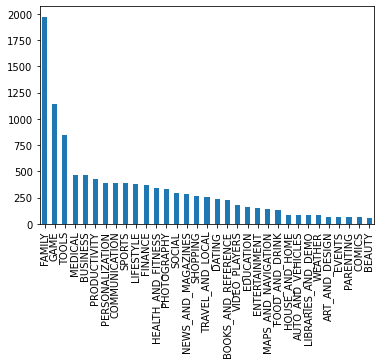

In [ ]:
play_store_data['Category'].value_counts().plot(kind='bar')

 above graph the most installed app category is family than games, medical

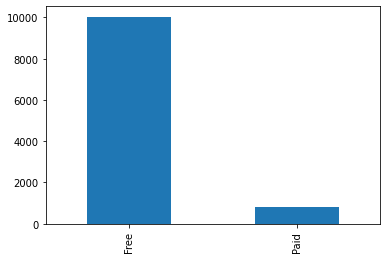

In [ ]:
play_store_data['Type'].value_counts().plot(kind='bar')

above graph we  can see that mostly app installled which are free

Q4-find which category of apps are mostly installed when type if Free

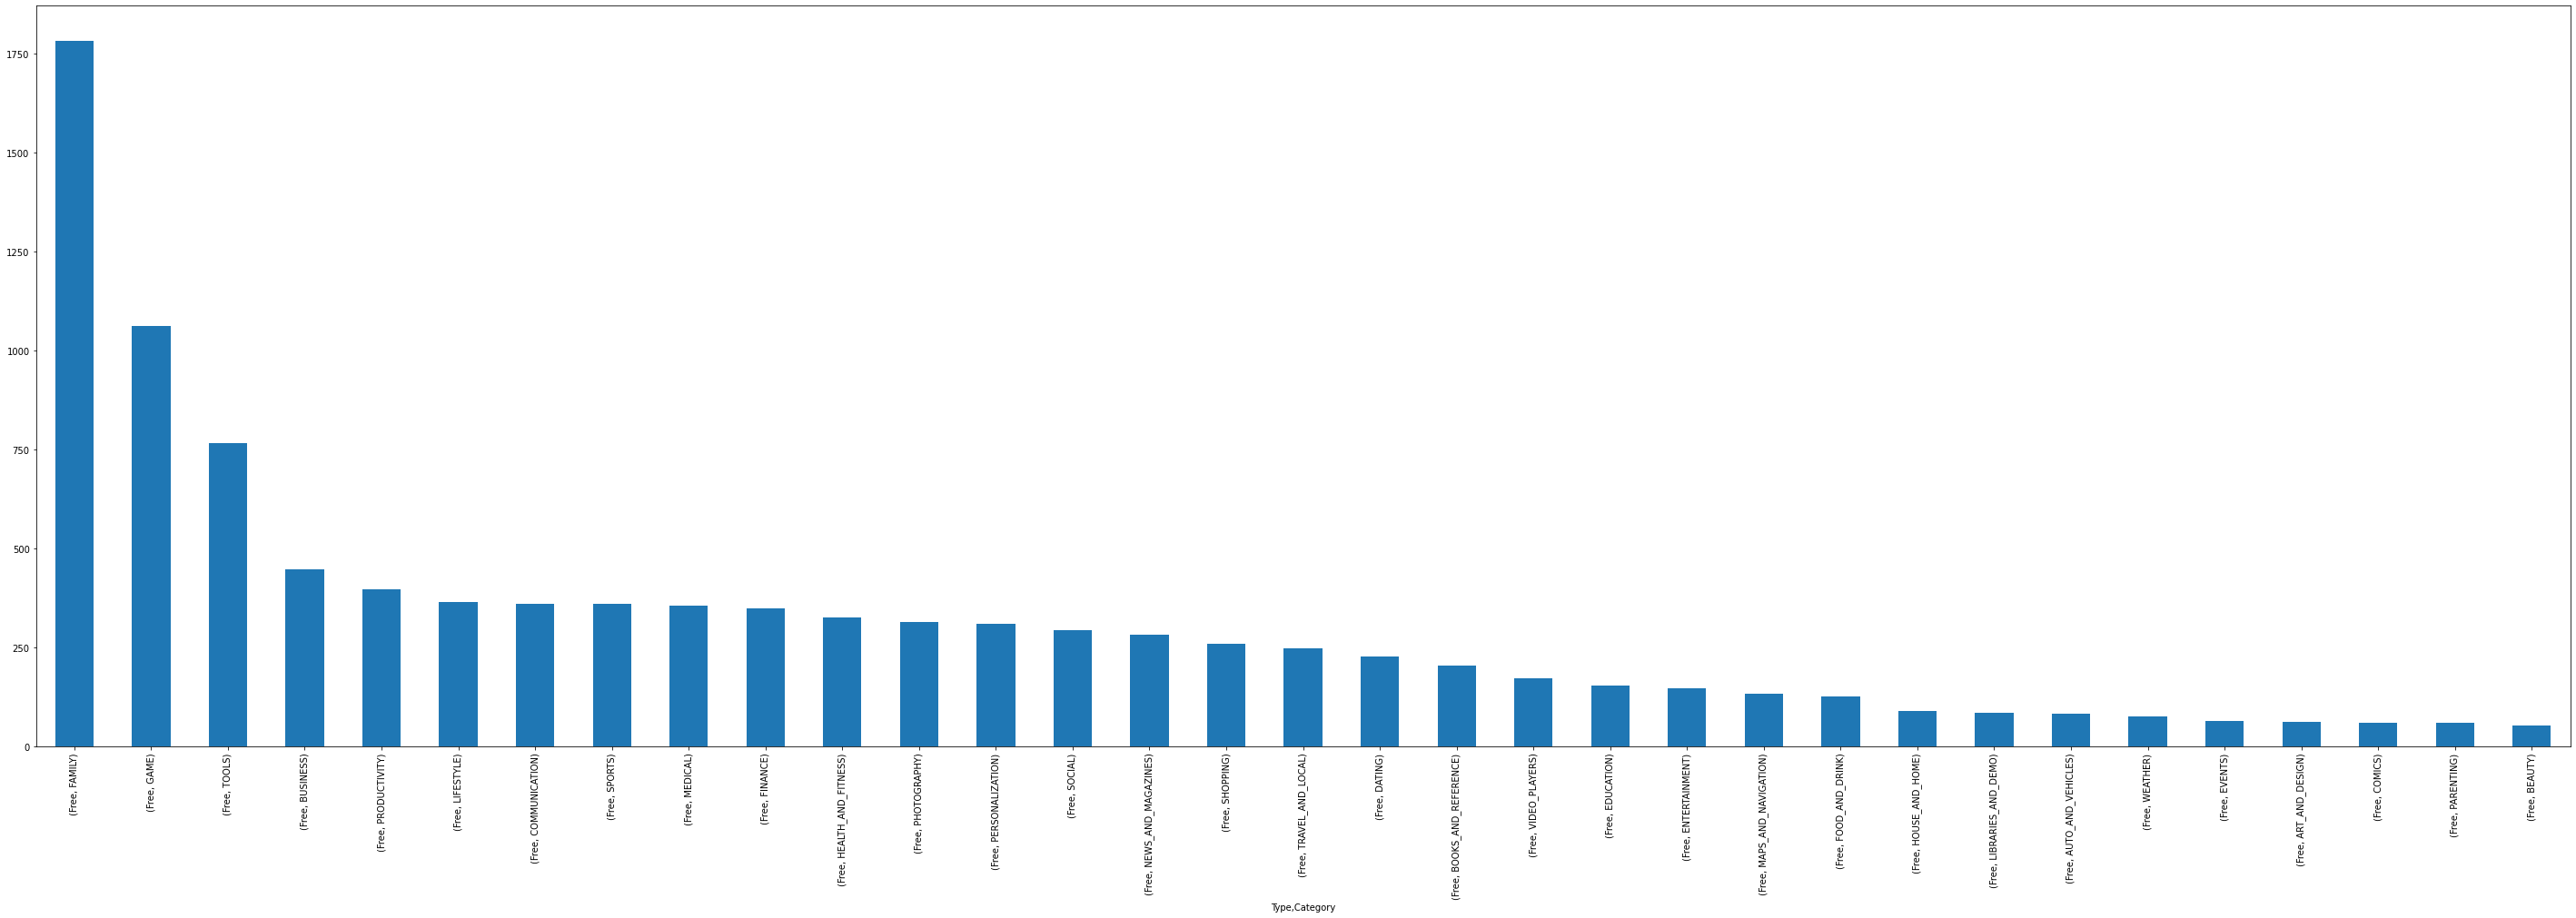

In [ ]:
play_store_data.groupby(play_store_data['Type'][play_store_data['Type']=='Free'])['Category'].value_counts().plot(kind='bar',figsize=(50,15))

if  the type is free , than from this graph we can see that which category has installed the app. Category is family and game and tools moslty installed apps

q5-find which category of apps are mostly installed when type if Paid

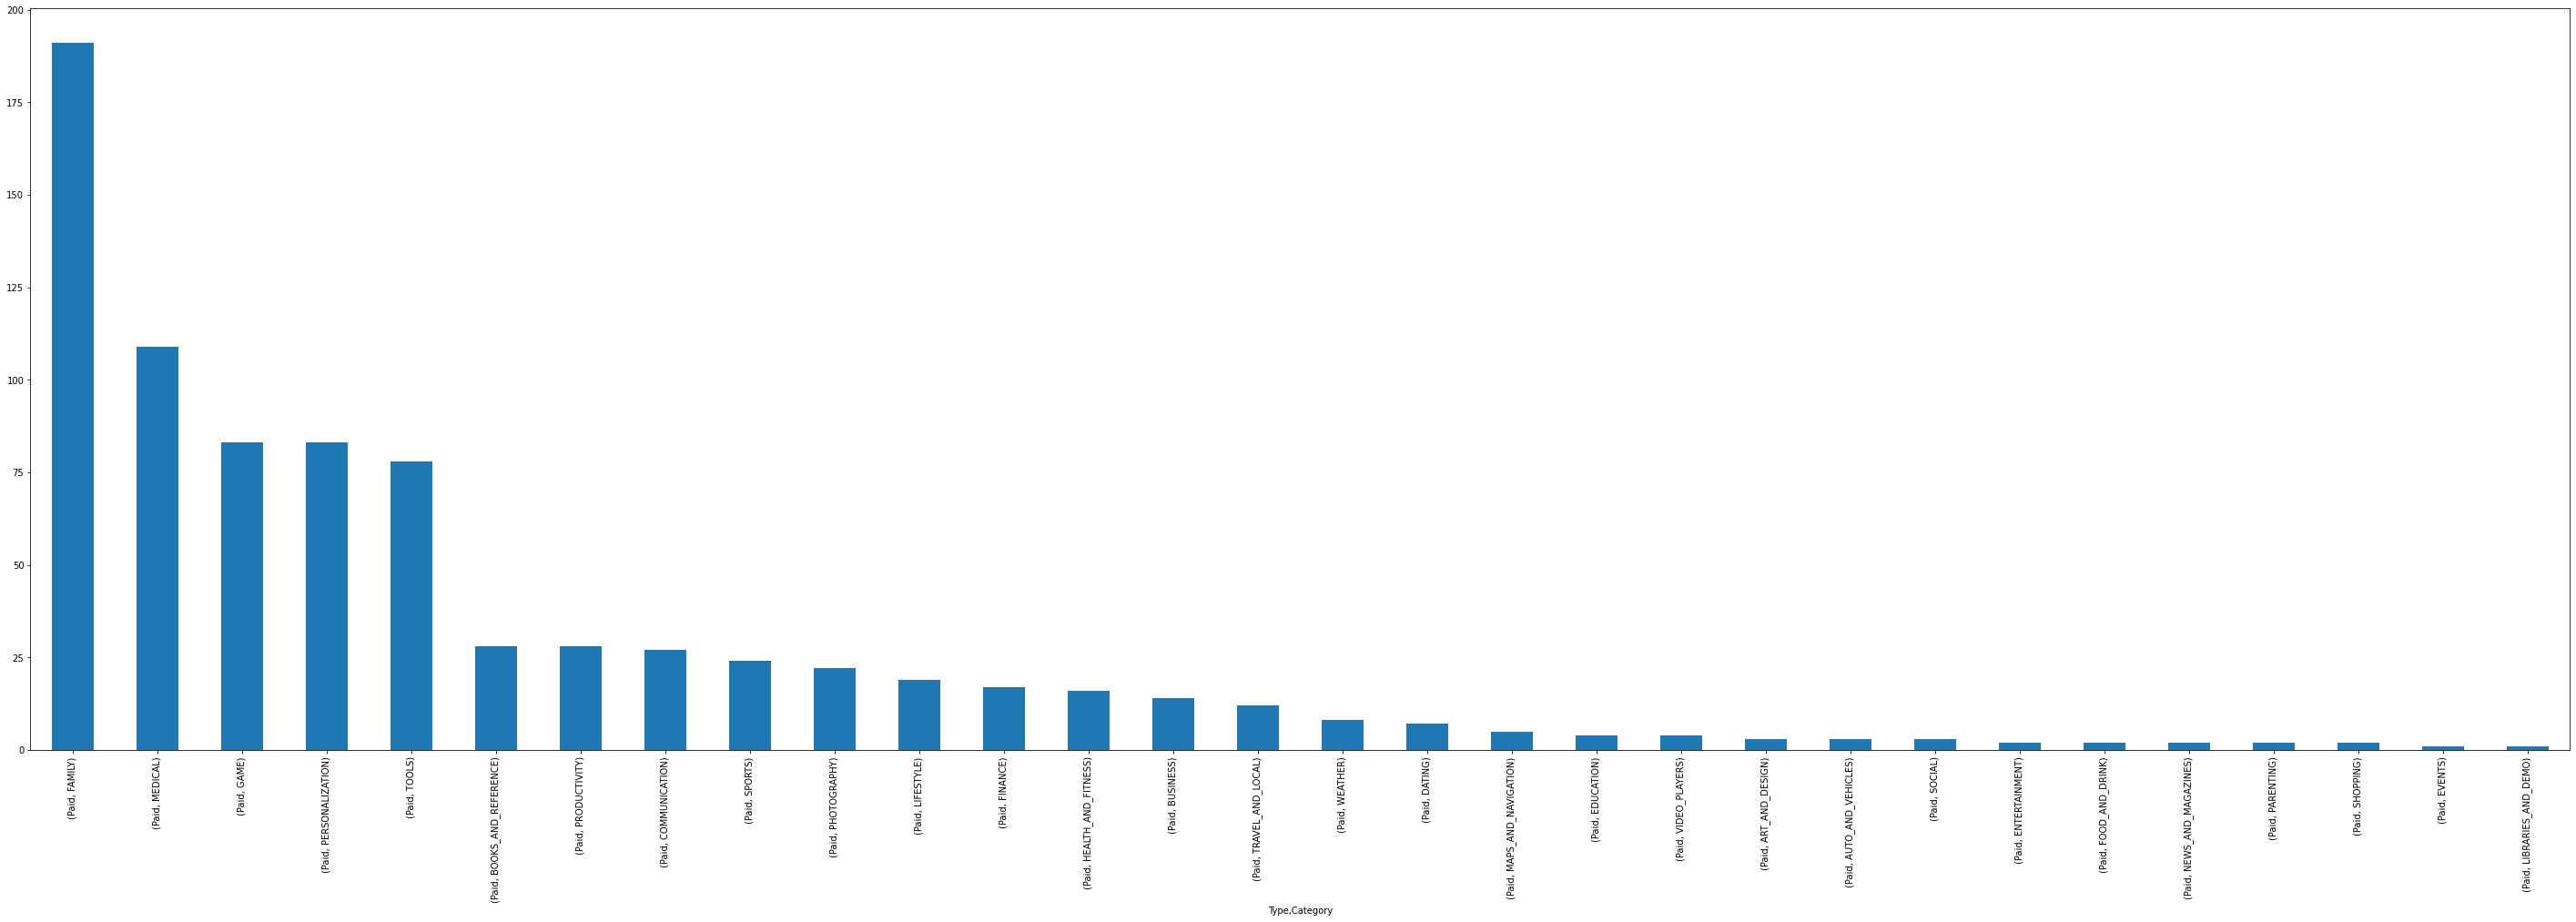

In [ ]:
play_store_data.groupby(play_store_data['Type'][play_store_data['Type']=='Paid'])['Category'].value_counts().plot(kind='bar',figsize=(50,15))

if the type is paid , than from this graph we can see that which category has installed the app. Category is family and medical  and games  moslty installed apps

In [ ]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015"


Q6 find mean values of installation and mean value of ration in category wise

In [ ]:
category = play_store_data.groupby('Category')
top_10_category = category['Installs'].agg(np.sum)

In [ ]:

category_df = play_store_data.groupby(['Category'])[['Rating']].mean()
category_rating = pd.merge(top_10_category,category_df, on='Category')
category_rating.head(10)

,Installs,Rating
Category,,
ART_AND_DESIGN,124338100,4.355385
AUTO_AND_VEHICLES,53130211,4.205882
BEAUTY,27197050,4.283019
BOOKS_AND_REFERENCE,1921469576,4.335498
BUSINESS,1001914865,4.182391
COMICS,56086150,4.160000
COMMUNICATION,32647276251,4.180103
DATING,264310807,4.025641
EDUCATION,871452000,4.388462


In this table we can find the mean values of installation and rating  category wise

Q7 find which genres apps install mostly ?

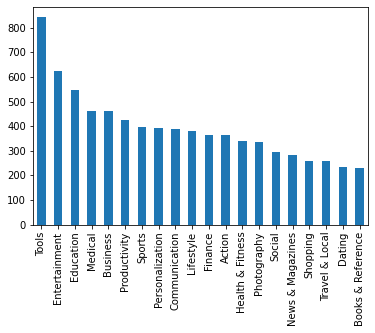

In [ ]:
play_store_data['Genres'].value_counts().head(20).plot.bar()

tools genre is the highest in term of installation  and Books and References are lowest 

Q8- find which genres category have maximum number of installation

In [ ]:
play_store_data.groupby(['Category','Genres'])['Installs'].max()

Category           Genres                               
ART_AND_DESIGN     Art & Design                               50000000
                   Art & Design;Action & Adventure              100000
                   Art & Design;Creativity                      500000
                   Art & Design;Pretend Play                    500000
AUTO_AND_VEHICLES  Auto & Vehicles                            10000000
                                                               ...    
TRAVEL_AND_LOCAL   Travel & Local;Action & Adventure            100000
VIDEO_PLAYERS      Video Players & Editors                  1000000000
                   Video Players & Editors;Creativity          5000000
                   Video Players & Editors;Music & Video      10000000
WEATHER            Weather                                    50000000
Name: Installs, Length: 149, dtype: int64

in above table we find which genres category have maximum number of installation


# Q9-Which Apps having highest number of reviews in playstore dataset ?


In [ ]:
max_app_reviews=play_store_data.sort_values(by='Reviews',ascending=False).head(20)

In [ ]:
max_app_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.1,78158306,11000000,1000000000,Free,0.0,Teen,Social,"August 3, 2018"
3943,Facebook,SOCIAL,4.1,78128208,11000000,1000000000,Free,0.0,Teen,Social,"August 3, 2018"
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11000000,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11000000,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,11000000,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
2604,Instagram,SOCIAL,4.5,66577446,11000000,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
2611,Instagram,SOCIAL,4.5,66577313,11000000,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
2545,Instagram,SOCIAL,4.5,66577313,11000000,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
3909,Instagram,SOCIAL,4.5,66509917,11000000,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,11000000,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"


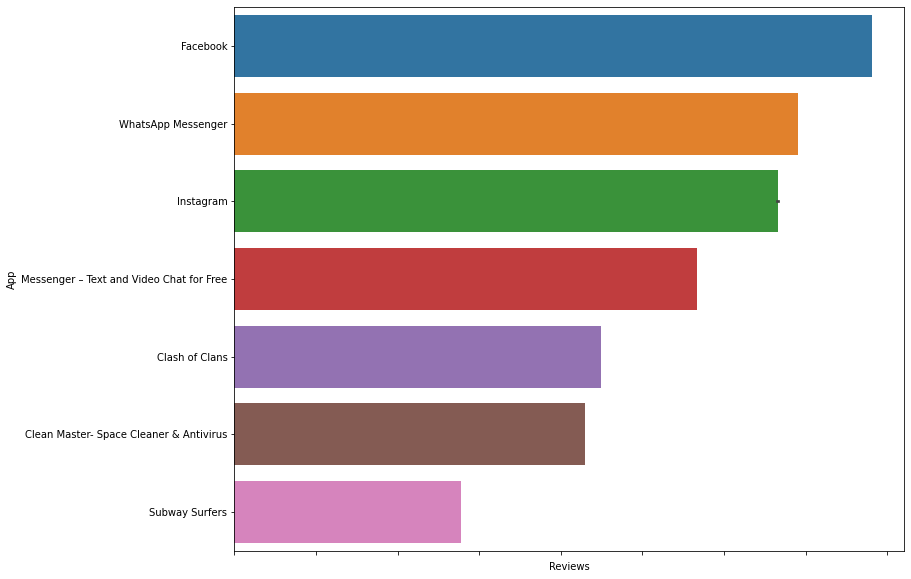

In [ ]:
plt.figure(figsize=(12,10))

a=sn.barplot(y=max_app_reviews.App,x=max_app_reviews.Reviews)
a.set_xticklabels(a.get_xticklabels(), rotation =45, horizontalalignment='right');
plt.show()

 above table facebook and whatapp , instragram have highest reviews

Q10-What percentage of apps are free and paid in playstore ?


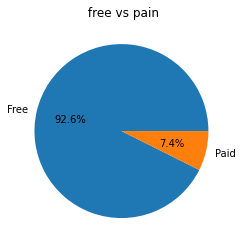

In [ ]:
labels=play_store_data['Type'].value_counts().index
data=play_store_data['Type'].value_counts()
plt.pie(data,   labels=labels, autopct='%1.1f%%', startangle=0)
plt.title(" free vs pain")
plt.show()

Q11-What are the top 20 expensive app in play store?

In [ ]:
play_store_data[play_store_data['Type']=='Paid'].sort_values(by='Price', ascending=False).head(20)[['App','Price','Installs','Category','Size']]

,App,Price,Installs,Category,Size
4367,I'm Rich - Trump Edition,400.00,10000,LIFESTYLE,7300000
5359,I am rich(premium),399.99,5000,FINANCE,965000
5373,I AM RICH PRO PLUS,399.99,1000,FINANCE,41000000
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,0,LIFESTYLE,40000000
5354,I am Rich Plus,399.99,10000,FAMILY,8700000
5351,I am rich,399.99,100000,LIFESTYLE,1800000
5358,I am Rich!,399.99,1000,FINANCE,22000000
5362,I Am Rich Pro,399.99,5000,FAMILY,2700000
4362,💎 I'm rich,399.99,10000,LIFESTYLE,26000000
5364,I am rich (Most expensive app),399.99,1000,FINANCE,2700000


Q12-What are the top 10 apps in terms of size ?

In [ ]:
play_store_data.sort_values('Size',ascending=False).head(20)[['App','Price','Rating','Reviews','Size']]

,App,Price,Rating,Reviews,Size
7404,SimCity BuildIt,0.00,4.5,4218587,100000000
3973,Hungry Shark Evolution,0.00,4.5,6071542,100000000
2299,Navi Radiography Pro,15.99,4.7,11,100000000
1793,Mini Golf King - Multiplayer Game,0.00,4.5,531458,100000000
5865,Gangster Town: Vice District,0.00,4.3,65146,100000000
9170,Stickman Legends: Shadow Wars,0.99,4.4,38419,100000000
5427,Ultimate Tennis,0.00,4.3,183004,100000000
1988,Hungry Shark Evolution,0.00,4.5,6074627,100000000
1758,Hungry Shark Evolution,0.00,4.5,6074334,100000000
1565,Talking Babsy Baby: Baby Games,0.00,4.0,140995,100000000


## **Feature engineering**

In [ ]:
play_store_data['earning']=play_store_data['Price'] * play_store_data['Installs']

In [ ]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,earning
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",0.0
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",0.0


Q13-find the top  10  mean values  of installation in category wise ?

In [ ]:
play_store_data.groupby('Category')['Installs'].agg(np.mean).head(10)


Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
Name: Installs, dtype: float64

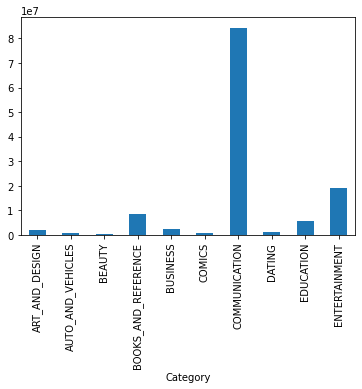

In [ ]:
play_store_data.groupby('Category')['Installs'].agg(np.mean).head(10).plot(kind='bar')

# Q14-which category apps have higest price

In [ ]:
top_category_10=play_store_data.groupby('Category')['Price'].agg(np.max).sort_values(ascending=False).head(10)

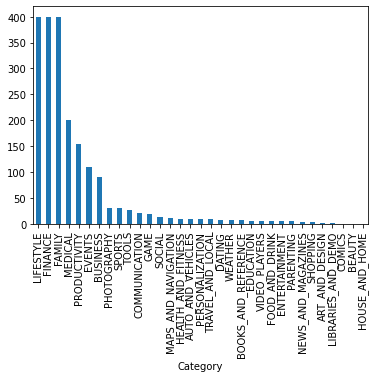

In [ ]:
play_store_data.groupby('Category')['Price'].agg(np.max).sort_values(ascending=False).plot(kind='bar')

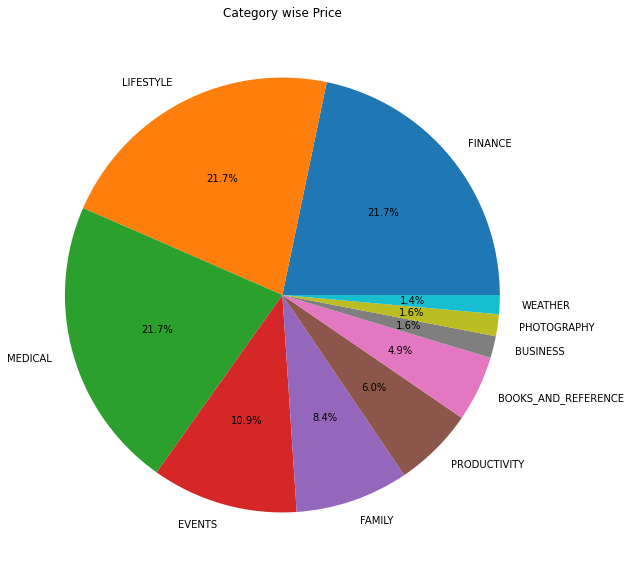

In [ ]:
plt.figure(figsize=(15,10))
labels = 'FINANCE','LIFESTYLE','MEDICAL','EVENTS','FAMILY','PRODUCTIVITY','BOOKS_AND_REFERENCE','BUSINESS','PHOTOGRAPHY','WEATHER' 
plt.pie(top_category_10 ,explode=None, labels=labels , autopct='%1.1f%%' , startangle=0)
plt.title('Category wise Price')
plt.show()

# Q15-**Which Apps makes the most earning on playstore ?**

In [ ]:
play_store_data.sort_values('earning',ascending=False)[['earning','App','Size','Category']]

,earning,App,Size,Category
4347,69900000.0,Minecraft,11000000,FAMILY
2241,69900000.0,Minecraft,11000000,FAMILY
5351,39999000.0,I am rich,1800000,LIFESTYLE
5356,19999500.0,I Am Rich Premium,4700000,FINANCE
4034,9900000.0,Hitman Sniper,29000000,GAME
...,...,...,...,...
3654,0.0,Yandex.Weather,11000000,WEATHER
3655,0.0,Local Weather Forecast & Visual Widget,6100000,WEATHER
3656,0.0,Wetter by t-online.de,9200000,WEATHER
3657,0.0,HTC Weather,11000000,WEATHER


In [ ]:
paid_apps = play_store_data[play_store_data['Type'] == 'Paid']
earning=paid_apps[['App','Installs','Price']]
earning['Earnings'] = earning['Installs'] * earning['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
earnings_sorted_ear = earning.sort_values(by='Earnings', ascending=False).head(50)
earning_sorted_pri = earnings_sorted_ear.sort_values(by='Price',ascending=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


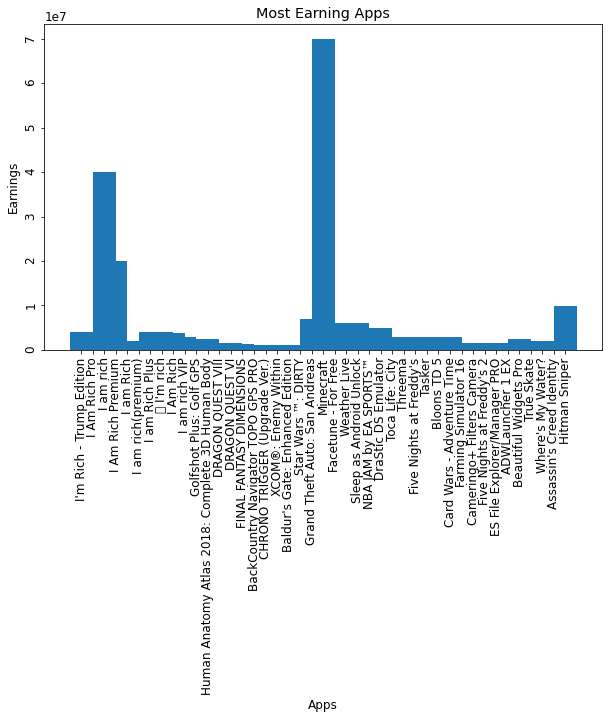

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(earning_sorted_pri.App, earning_sorted_pri.Earnings, width=2, label=earning_sorted_pri.Earnings )
plt.title('Most Earning Apps')
plt.tick_params(rotation=90)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.show()

In [ ]:
user_review="https://drive.google.com/file/d/1Y6y_rc84VZR1gLRPvcurTrzh-4OTuLLo/view?usp=sharing"
user_review='https://drive.google.com/uc?id=' + user_review.split("/")[-2]

In [ ]:
user_review=pd.read_csv(user_review)

In [ ]:
user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
user_review.dropna(axis=0,inplace=True)

In [ ]:
import matplotlib

Q16.What is sentiments percentage of reviews?


In [ ]:
user_review_sentiment=user_review['Sentiment'].value_counts()

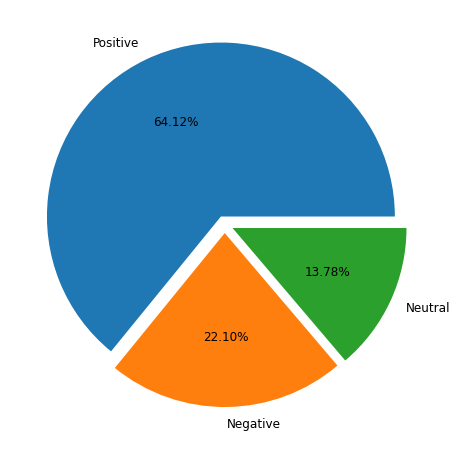

In [ ]:
labels = 'Positive','Negative', 'Neutral'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8,8)
plt.pie(user_review_sentiment, labels=labels, explode=[0.05,0.05,0.05], autopct='%.2f%%')
plt.show()

Q17-find correlation of numerical column in play store data

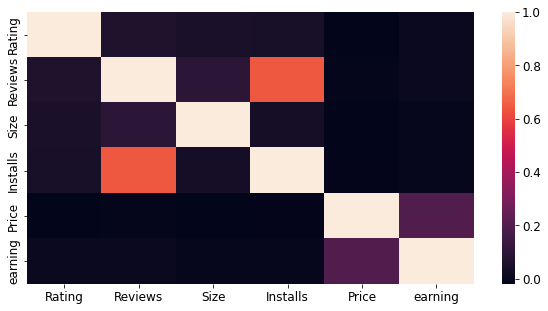

In [ ]:
corr_df = play_store_data.corr()
corr_df
plt.figure(figsize=(10,5))
sn.heatmap(corr_df)

In [ ]:
print (corr_df)

            Rating   Reviews      Size  Installs     Price   earning
Rating    1.000000  0.063166  0.050965  0.045496 -0.019318  0.009065
Reviews   0.063166  1.000000  0.098108  0.643122 -0.009667  0.005094
Size      0.050965  0.098108  1.000000  0.039566 -0.018473 -0.004649
Installs  0.045496  0.643122  0.039566  1.000000 -0.011689 -0.004503
Price    -0.019318 -0.009667 -0.018473 -0.011689  1.000000  0.194457
earning   0.009065  0.005094 -0.004649 -0.004503  0.194457  1.000000



The Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining.